<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Comparing Clustering Algorithm Effectiveness

_Authors: Tim Book (DC), Kiefer Katovich (SF)_

---

In this lab, you'll test three of the clustering algorithms we've covered on seven data sets that are specifically designed to evaluate clustering algorithm effectiveness.

This lab is exploratory and heavy on data visualization.


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

---

### 1) Load the data sets.

Each of the seven data sets have three columns:

    x
    y
    label
    
Because they each only have two variables, they're easy to examine visually. You’ll compare the “true” labels for the data to the clusters the algorithms find.

In [14]:
flame = pd.read_csv('../datasets/flame.csv')
agg = pd.read_csv('../datasets/aggregation.csv')
comp = pd.read_csv('../datasets/compound.csv')
jain = pd.read_csv('../datasets/jain.csv')
path = pd.read_csv('../datasets/pathbased.csv')
r15 = pd.read_csv('../datasets/r15.csv')
spiral = pd.read_csv('../datasets/spiral.csv')

---

### 2) Plot each of the data sets with colored true labels.

The data sets have different numbers of unique labels, so you'll need to figure out how many there are for each and color the clusters accordingly (for example, `r15` has 15 different clusters).

You might find [this](https://matplotlib.org/examples/color/colormaps_reference.html) help page on colormaps useful!

In [15]:
# Plotting function.
# Plotting function should take (df, name) as arguments. `name` will be the plot's title.

# Easiest:
def plot_clusters(df, name):
    df.plot(kind='scatter', x='x', y='y', c='label', colormap='tab20')
    plt.title(name, fontsize=20);
    
# Hard:
def plot_clusters(df, name):
    n_clusters = df.label.nunique()
    
    fig, ax = plt.subplots()
    
    colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
    
    for lbl, col in zip(df.label.unique(), colors):
        df_cluster = df[df.label == lbl]
        plt.scatter(df_cluster.x, df_cluster.y, color=col, label=lbl)
        
    ax.legend(loc='lower right')
    ax.set_title(name, fontsize=20)
    plt.show()

In [16]:
dfs = [
    (flame, 'flame'),
    (agg, 'agg'),
    (comp, 'comp'),
    (jain, 'jain'),
    (path, 'path'),
    (r15, 'r15'),
    (spiral, 'spiral')
]

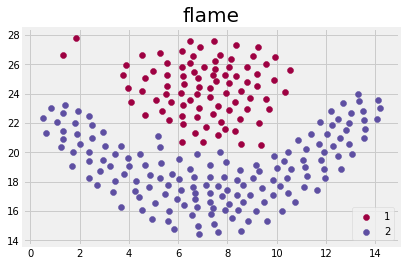

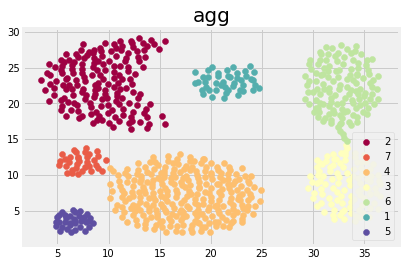

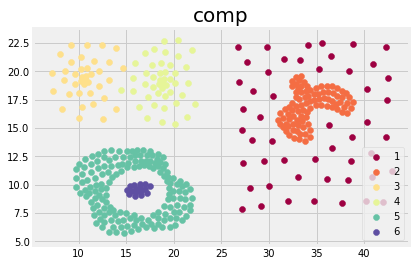

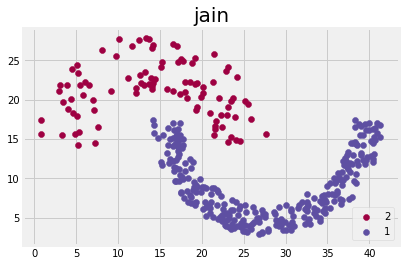

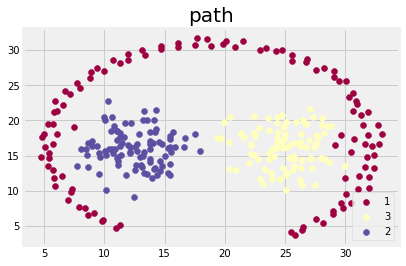

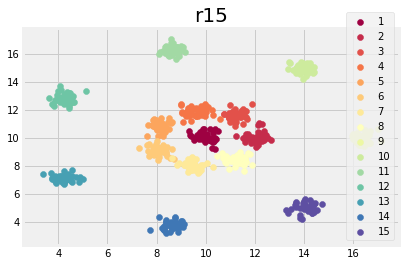

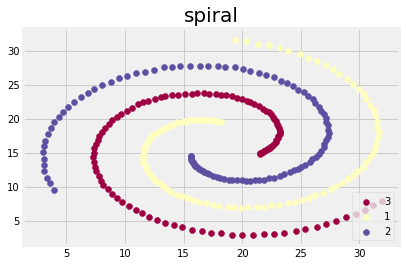

[None, None, None, None, None, None, None]

In [17]:
# Plot each data set with the true cluster labels.
[plot_clusters(df, name) for df, name in dfs]

---

### 3) Write a plotting function (or functions) to compare the performance of the three clustering algorithms.

Load in the three clustering algorithms we covered earlier in the class.

    K-means: k-means clustering.
    Agglomerative clustering: hierarchical clustering (bottom up).
    DBSCAN: density-based clustering.
    
Your function(s) should allow you to visually examine the effects of changing different parameters in the clustering algorithms. The parameters you should explore, at minimum, are:

    K-means:
        n_clusters
    Agglomerative clustering:
        n_clusters
    DBSCAN
        eps
        min_samples
        
Feel free to explore other parameters for these models.


In [18]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### But first: Let's write a function that scales our data for us.
Why do we need to scale our data for clustering algorithms? (thread)

In [19]:
# Write your function to scale data here.
def scale_matrix(X):
    sc = StandardScaler()
    return sc.fit_transform(X)

In [20]:
# Write a function that will plot the results of the three
# clustering algorithms for comparison.

# Your function should take TWO INPUTS:
# 1 - The data
# 2 - The clusterer

# Your function should do TWO THINGS:
# 1 - Print the SILHOUETTE SCORE for your clusters
# 2 - Plot the clusteres with appropriate colring

def plot_results(df, cl):
    X = df[['x', 'y']]
    X_sc = scale_matrix(X)
    cl.fit(X_sc)
    df['cluster'] = cl.labels_
    sil = silhouette_score(X_sc, cl.labels_)
    print(f"SILHOUETTE SCORE = {sil}")
    df.plot(kind='scatter', x='x', y='y', c='cluster', colormap='tab20')

## 4) Tinkering with clustering parameters.

In the following sections, look at how the parameters affect the clustering algorithms and try to get clusters that make sense. There is no right answer here, as these are unsupervised techniques.

Don't forget to check out **silhouette scores!**

### 4.A) Find good parameters for the `flame` data set.

Which algorithm (visually) performs best?

SILHOUETTE SCORE = 0.2077140848992025


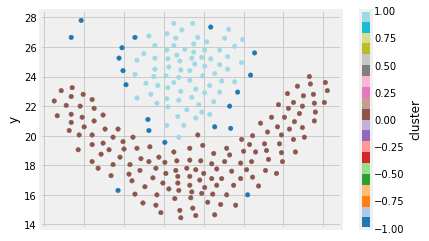

In [21]:
# A:
# cl = KMeans(n_clusters=2)
cl = DBSCAN(eps=0.25, min_samples=4)
plot_results(flame, cl)

---

### 4.B) Find good parameters for the `agg` data set.

Which algorithm (visually) performs best?

SILHOUETTE SCORE = 0.46877399973025546


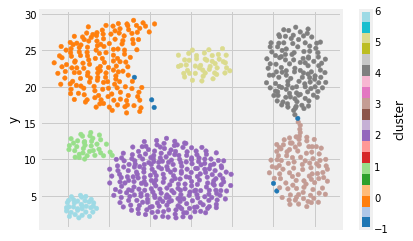

In [22]:
# A:
# cl = KMeans(n_clusters=7)
# cl = AgglomerativeClustering(n_clusters=7)
cl = DBSCAN(min_samples=6, eps=0.14)
plot_results(agg, cl)

---

### 4.C) Find good parameters for the `comp` data set.

Which algorithm (visually) performs best?

In [23]:
# A:

---

### 4.D) Find good parameters for the `jain` data set.

Which algorithm (visually) performs best?

In [24]:
# A:

---

### 4.E) Find good parameters for the `pathbased` data set.

Which algorithm (visually) performs best?

In [25]:
# A:

---

### 4.F) Find good parameters for the `r15` data set.

Which algorithm (visually) performs best?

In [26]:
# A:

---

### 4.G) Find good parameters for the `spiral` data set.

Which algorithm (visually) performs best?

In [27]:
# A:

## 5) Melbourne Housing
Data come from [this](https://www.kaggle.com/anthonypino/melbourne-housing-market) Kaggle page.

In [28]:
mel = pd.read_csv('../datasets/melbourne.csv')
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 5a) Fix bad variable names
We're only going to look at three variables here, and two of them are spelled wrong! Change the lat/long column names to either be spelled correctly or abbrevited as `lat`/`long`. While we're add it, let's change `Price` --> `price`.

In [29]:
mel.rename(columns={
    'Longtitude': 'long',
    'Lattitude': 'lat',
    'Price': 'price'
}, inplace=True)

### 5b) Drop missings
Drop all rows where either `lat`, `long`, or `price` is missing.

In [30]:
mel = mel[mel.lat.notnull() & mel.long.notnull() & mel.price.notnull()]

### 5c) Plot lat vs long
What kind of clustering do you want to do?

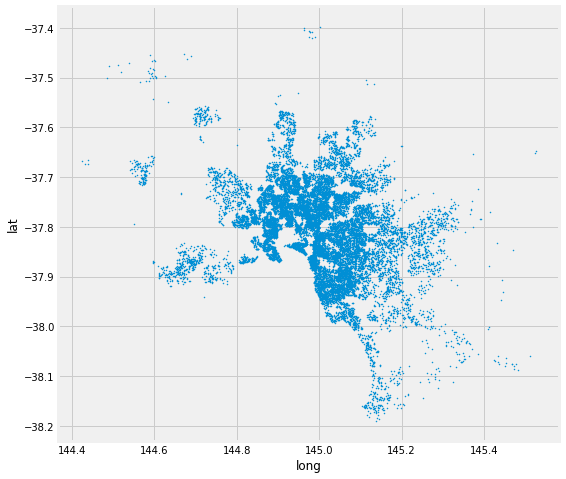

In [31]:
mel.plot(kind='scatter', x='long', y='lat', s=1, figsize=(8, 8));

### 5d) Prepare X matrix by scaling
Why do we need to scale? (thread)

In [32]:
X = mel.loc[:, ['lat', 'long']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### 5e) Cluster and plot clusters

In [33]:
km = KMeans(n_clusters=8)
km.fit(X_sc)
mel['cluster'] = km.labels_

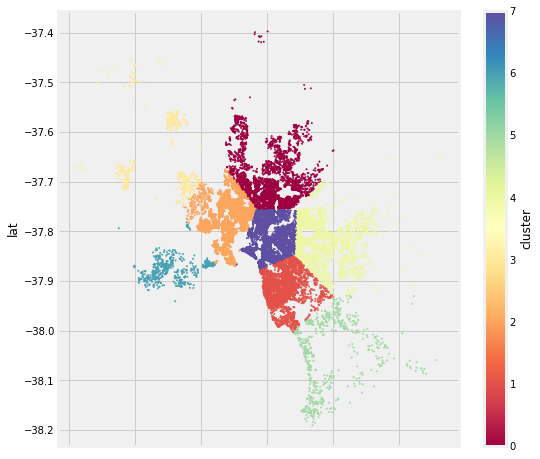

In [34]:
mel.plot(
    kind='scatter',
    x='long',
    y='lat',
    c='cluster',
    colormap='Spectral',
    s=2,
    figsize=(8, 8)
)

### 5f) Do prices differ by cluster?

In [35]:
mel.groupby('cluster').price.mean()

cluster
0    7.516075e+05
1    1.360462e+06
2    9.177437e+05
3    5.814632e+05
4    1.262471e+06
5    7.745029e+05
6    6.313783e+05
7    1.365445e+06
Name: price, dtype: float64

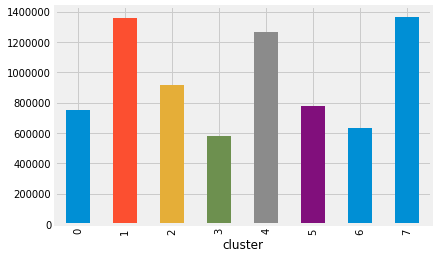

In [36]:
mel.groupby('cluster').price.mean().plot(kind='bar')